In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

In [61]:
np.random.seed(222)
count = 200
X = np.random.normal(0,1,count)
W = np.random.normal(0,10,count)
E = np.random.normal(0,3,count)
Y = 11 + 3.4*X + E

In [62]:
def rsq(y1, y2):
    diff = y1 - y2
    SSresid = np.sum(diff**2)
    SStotal = len(y1) * np.var(y1)
    r2 = 1- SSresid/SStotal
    return r2

def plot(a):
    plt.plot(X,Y,'ko', label='data')
    xp = np.linspace(-3, 3, 100)
    slope = str(np.round(a[0],2))
    inter = str(np.round(a[1],2))
    eq = 'y='+inter+'+'+slope+'x'
    plt.plot(xp, a[1]+xp*a[0], 'r-', label=eq)
    plt.grid()
    plt.legend()
    plt.show()

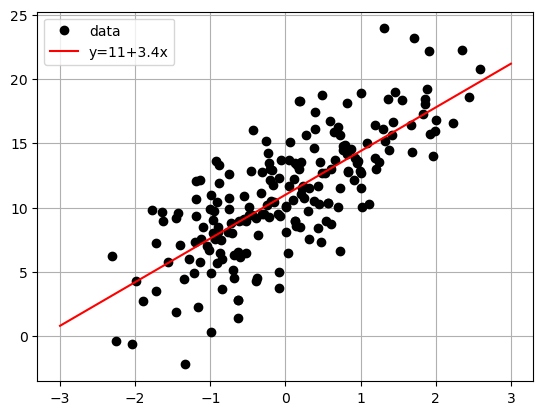

In [63]:
plot([3.4, 11])

[ 3.46163269 10.9890738 ] 0.5736692450964399


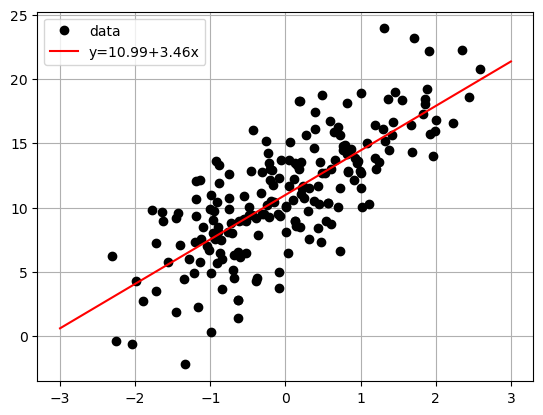

[ 3.46163269 10.9890738 ] 0.5736692450964398


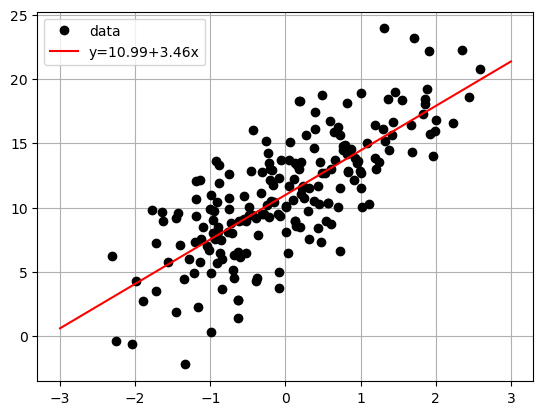

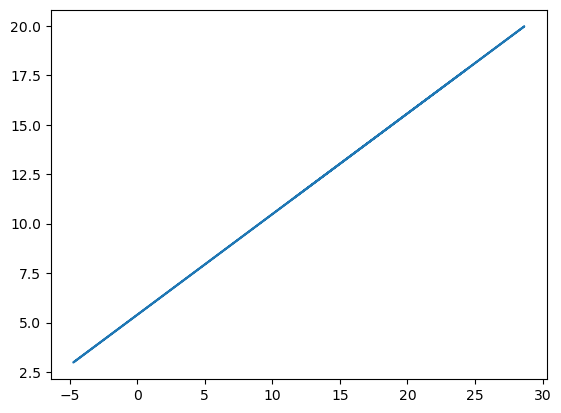

In [86]:
Xm = np.vstack((X, np.ones(len(X)))).T

XTX = np.dot(Xm.T, Xm)
XTY = np.dot(Xm.T, Y)

F = np.linalg.solve(XTX,XTY)
# yfit = F[0]*X + F[1]
yfit = np.matmul(Xm, F)
print(F, rsq(Y, yfit))
plot(F)


F = np.linalg.lstsq(Xm,Y,rcond=None)
F = F[0]
yfit = np.matmul(Xm, F)
print(F, rsq(Y, yfit))
plot(F)

plt.plot(y,yfit)
plt.show()

[ 3.46163269 10.9890738 ] 0.5736692450964399


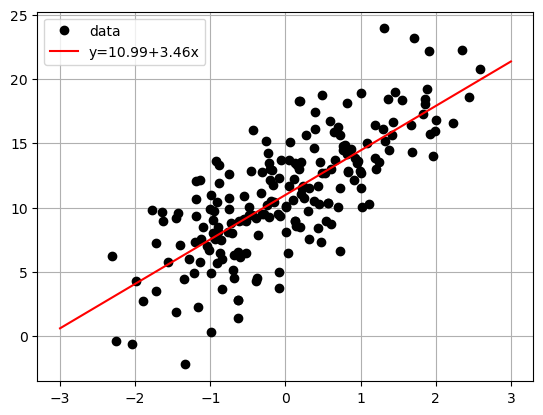

[ 3.46163269 10.9890738 ] 0.5736692450964398


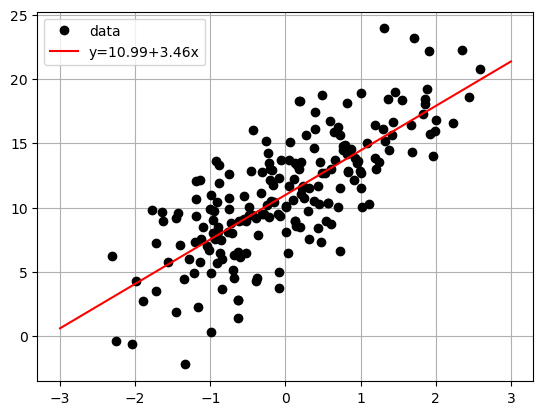

In [87]:
Xm = np.vstack((X, np.ones(len(X)))).T

XTX = np.dot(Xm.T, Xm)
XTY = np.dot(Xm.T, Y)

F = np.linalg.solve(XTX,XTY)
yfit = np.matmul(Xm, F)
print(F, rsq(Y, yfit))
plot(F)


F = np.linalg.lstsq(Xm,Y,rcond=None)
F = F[0]
yfit = np.matmul(Xm, F)
print(F, rsq(Y, yfit))
plot(F)